In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

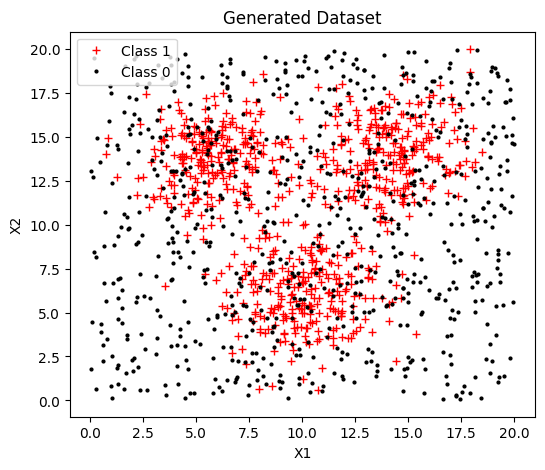

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Create the dataset
# -----------------------------
N = 1500
mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))

Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

# Plot dataset
plt.figure(figsize=(6,5))
plt.plot(X[:int(N/2),0], X[:int(N/2),1], 'r+', label='Class 1')
plt.plot(X[int(N/2):,0], X[int(N/2):,1], 'k.', ms=4, label='Class 0')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Generated Dataset")
plt.legend()
plt.show()

# -----------------------------
# Step 2: Split dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


  

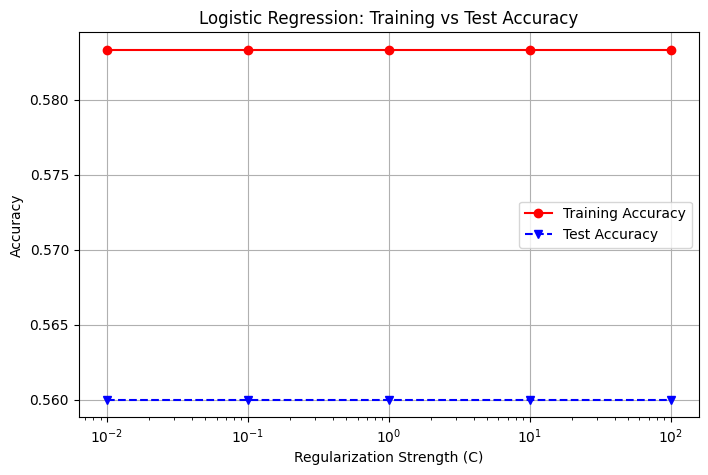

In [6]:
#logistic reg
from sklearn.linear_model import LogisticRegression

# Parameters for Logistic Regression: vary regularization strength C
C_values = [0.01, 0.1, 1, 10, 100]
train_acc_lr = []
test_acc_lr = []

for C in C_values:
    clf = LogisticRegression(C=C, max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc_lr.append(accuracy_score(y_train, y_train_pred))
    test_acc_lr.append(accuracy_score(y_test, y_test_pred))

# Plot accuracy vs C
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_lr, 'r-o', label='Training Accuracy')
plt.plot(C_values, test_acc_lr, 'b--v', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Training vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


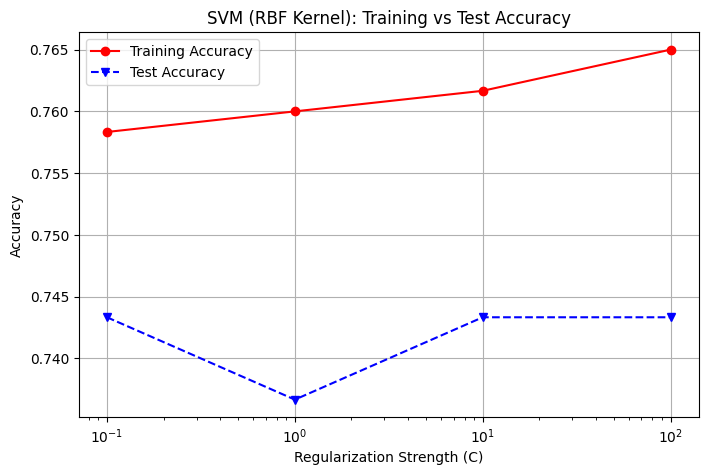

In [7]:
#svm
from sklearn.svm import SVC

# Parameters for SVM: vary kernel type or regularization C
C_values_svm = [0.1, 1, 10, 100]
train_acc_svm = []
test_acc_svm = []

for C in C_values_svm:
    clf = SVC(C=C, kernel='rbf', gamma='scale', random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc_svm.append(accuracy_score(y_train, y_train_pred))
    test_acc_svm.append(accuracy_score(y_test, y_test_pred))

# Plot accuracy vs C
plt.figure(figsize=(8,5))
plt.plot(C_values_svm, train_acc_svm, 'r-o', label='Training Accuracy')
plt.plot(C_values_svm, test_acc_svm, 'b--v', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("SVM (RBF Kernel): Training vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#conclusion:
#both graphs are showing both models are over fitting